In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

e_prj = pd.read_csv('IEA CCUS Projects Database 2023.csv')

e_prj = e_prj.drop(columns = ['Ref 1','Ref 2','Ref 3', 'Ref 4','Ref 5','Ref 6','Ref 7','Link 1','Link 2','Link 3',
                             'Link 4','Link 5','Link 6','Link 7'])
active_prj = e_prj.drop(e_prj[e_prj['Project Status']=='Decommissioned'].index)

active_prj = active_prj.sort_values(by ='Country')



active_prj['Info Category'] = "Energy Project"
active_prj['Source'] = "IEA"

desired_columns_order = ['Source','Info Category']
remaining_columns = [col for col in active_prj.columns if col not in desired_columns_order]
new_column_order = desired_columns_order + remaining_columns
active_prj = active_prj[new_column_order].reset_index()

active_prj

,index,Source,Info Category,Project name,Country,Partners,Project type,Announcement,FID,Operation,Suspension/decommissioning,Project Status,Project phase,Announced capacity (low) (Mt CO2/yr),Announced capacity (high) (Mt CO2/yr),Sector,Fate of carbon,Part of CCUS hub
0,498,IEA,Energy Project,Santos Carnavon Basin storage (Reindeer CCS),Australia,Santos Offshore Pty Ltd (50% and Operator) and...,Storage,2022.0,2025.0,2028.0,NaN,Planned,NaN,2.400,2.400,CO2 storage,Dedicated storage,Santos Carnavon Basin storage (Reindeer CCS)
1,266,IEA,Energy Project,H2Perth Woodside,Australia,"Woodside, McDermott (pre-FEED)",Full chain,2021.0,2023.0,NaN,NaN,Planned,NaN,NaN,NaN,Hydrogen/ammonia,Unknown/unspecified,NaN
2,48,IEA,Energy Project,Barossa and Darwin liquefied natural gas (DLNG...,Australia,"Santos (43.4%), SK E&S, JERA",Capture,2021.0,2023.0,2025.0,NaN,Planned,NaN,2.300,2.300,Natural gas processing,Dedicated storage,Bayu-Undan field storage hub
3,516,IEA,Energy Project,South West Hub Project,Australia,"Department of Mines, Industry Regulation and S...",Storage,2010.0,NaN,NaN,NaN,Planned,NaN,0.800,0.800,CO2 T&S,Dedicated storage,South West Hub Project
4,100,IEA,Energy Project,CarbonNet,Australia,"Victorian Government/Australian Government, (DNV)",T&S,2010.0,2024.0,2030.0,NaN,Planned,NaN,5.000,5.000,CO2 T&S,Dedicated storage,CarbonNET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,243,IEA,Energy Project,Granite Falls biorefinery (MN),United States,"Granite Falls Energy, Summit Carbon Solutions",Capture,2021.0,2023.0,2024.0,NaN,Planned,NaN,0.150,0.180,Biofuels,Dedicated storage,Midwest carbon express
566,248,IEA,Energy Project,Green Plains Otter Tail biorefinery (MN),United States,"Green Plains Otter Tail, Summit Carbon Solutions",Capture,2021.0,2023.0,2024.0,NaN,Planned,NaN,0.172,0.172,Biofuels,Dedicated storage,Midwest carbon express
567,411,IEA,Energy Project,Oxy CE DAC 100 plants announcement (- 30 in Te...,Unknown,"1PointFive, Carbon Engineering",Full chain,2022.0,NaN,2035.0,NaN,Planned,2.0,NaN,NaN,Direct Air Capture,Dedicated storage,NaN
568,410,IEA,Energy Project,Oxy CE DAC 100 plants announcement (- 30 in Te...,Unknown,"1PointFive, Carbon Engineering",Full chain,2022.0,NaN,2030.0,NaN,Planned,1.0,NaN,NaN,Direct Air Capture,Dedicated storage,NaN


In [38]:
active_prj.describe()

,Announcement,FID,Operation,Suspension/decommissioning,Project phase,Announced capacity (low) (Mt CO2/yr),Announced capacity (high) (Mt CO2/yr)
count,552.000000,177.000000,385.000000,2.000000,129.000000,422.000000,422.000000
mean,2020.132246,2021.536723,2024.729870,2019.500000,1.581395,2.585439,2.795001
std,3.482220,4.844169,7.314353,0.707107,0.669628,4.078504,4.541808
min,1991.000000,1984.000000,1972.000000,2019.000000,1.000000,0.001000,0.001000
25%,2020.000000,2022.000000,2024.000000,2019.250000,1.000000,0.346250,0.363000
50%,2021.000000,2023.000000,2025.000000,2019.500000,1.000000,1.000000,1.160000
75%,2022.000000,2023.000000,2028.000000,2019.750000,2.000000,2.975000,3.000000
max,2023.000000,2026.000000,2040.000000,2020.000000,4.000000,30.000000,40.000000


In [4]:
active_prj.info()

active_prj.to_csv('active_reneng_prj.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   index                                  570 non-null    int64  
 1   Source                                 570 non-null    object 
 2   Info Category                          570 non-null    object 
 3   Project name                           570 non-null    object 
 4   Country                                570 non-null    object 
 5   Partners                               569 non-null    object 
 6   Project type                           570 non-null    object 
 7   Announcement                           552 non-null    float64
 8   FID                                    177 non-null    float64
 9   Operation                              385 non-null    float64
 10  Suspension/decommissioning             2 non-null      float64
 11  Projec

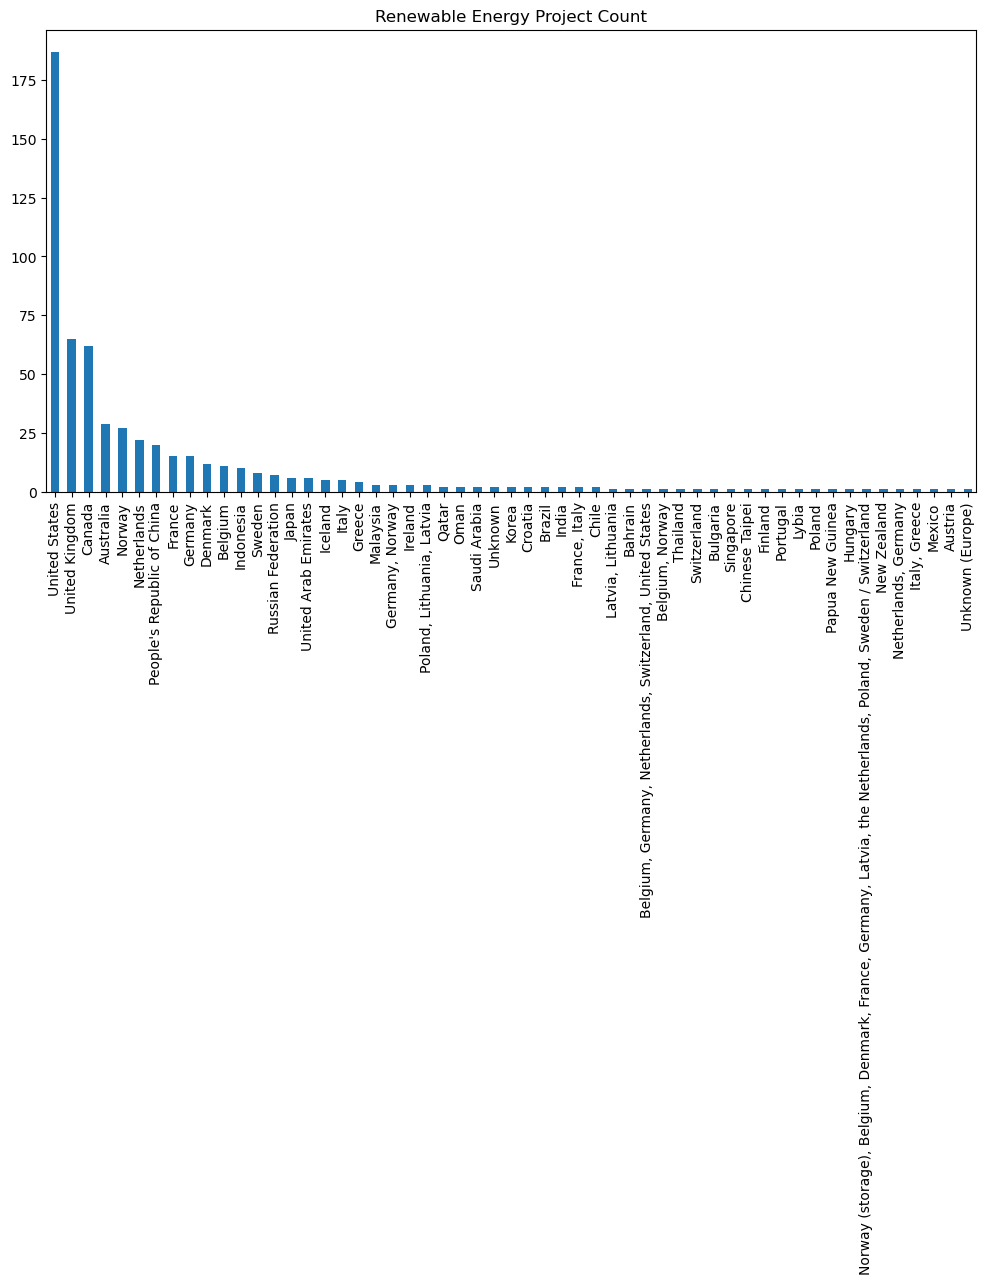

In [102]:
c_prj_cnt = active_prj['Country'].value_counts()

fig, ax = plt.subplots(figsize=(12,6))

c_prj_cnt.plot(kind='bar')
plt.title('Renewable Energy Project Count')
plt.show()

In [84]:
active_prj

,index,Source,Info Category,Project name,Country,Partners,Project type,Announcement,FID,Operation,Suspension/decommissioning,Project Status,Project phase,Announced capacity (low) (Mt CO2/yr),Announced capacity (high) (Mt CO2/yr),Sector,Fate of carbon,Part of CCUS hub
0,498,IEA,Energy Project,Santos Carnavon Basin storage (Reindeer CCS),Australia,Santos Offshore Pty Ltd (50% and Operator) and...,Storage,2022.0,2025.0,2028.0,NaN,Planned,NaN,2.400,2.400,CO2 storage,Dedicated storage,Santos Carnavon Basin storage (Reindeer CCS)
1,266,IEA,Energy Project,H2Perth Woodside,Australia,"Woodside, McDermott (pre-FEED)",Full chain,2021.0,2023.0,NaN,NaN,Planned,NaN,NaN,NaN,Hydrogen/ammonia,Unknown/unspecified,NaN
2,48,IEA,Energy Project,Barossa and Darwin liquefied natural gas (DLNG...,Australia,"Santos (43.4%), SK E&S, JERA",Capture,2021.0,2023.0,2025.0,NaN,Planned,NaN,2.300,2.300,Natural gas processing,Dedicated storage,Bayu-Undan field storage hub
3,516,IEA,Energy Project,South West Hub Project,Australia,"Department of Mines, Industry Regulation and S...",Storage,2010.0,NaN,NaN,NaN,Planned,NaN,0.800,0.800,CO2 T&S,Dedicated storage,South West Hub Project
4,100,IEA,Energy Project,CarbonNet,Australia,"Victorian Government/Australian Government, (DNV)",T&S,2010.0,2024.0,2030.0,NaN,Planned,NaN,5.000,5.000,CO2 T&S,Dedicated storage,CarbonNET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,243,IEA,Energy Project,Granite Falls biorefinery (MN),United States,"Granite Falls Energy, Summit Carbon Solutions",Capture,2021.0,2023.0,2024.0,NaN,Planned,NaN,0.150,0.180,Biofuels,Dedicated storage,Midwest carbon express
566,248,IEA,Energy Project,Green Plains Otter Tail biorefinery (MN),United States,"Green Plains Otter Tail, Summit Carbon Solutions",Capture,2021.0,2023.0,2024.0,NaN,Planned,NaN,0.172,0.172,Biofuels,Dedicated storage,Midwest carbon express
567,411,IEA,Energy Project,Oxy CE DAC 100 plants announcement (- 30 in Te...,Unknown,"1PointFive, Carbon Engineering",Full chain,2022.0,NaN,2035.0,NaN,Planned,2.0,NaN,NaN,Direct Air Capture,Dedicated storage,NaN
568,410,IEA,Energy Project,Oxy CE DAC 100 plants announcement (- 30 in Te...,Unknown,"1PointFive, Carbon Engineering",Full chain,2022.0,NaN,2030.0,NaN,Planned,1.0,NaN,NaN,Direct Air Capture,Dedicated storage,NaN


In [34]:
budg1 = pd.read_csv('COUNTRY_BUDGETS_1.csv')
budg2 = pd.read_csv('COUNTRY_BUDGETS_2.csv')
budg3 = pd.read_csv('COUNTRY_BUDGETS_3.csv')

e_budg = pd.concat([budg1,budg2,budg3], ignore_index = True)
e_budg = e_budg.drop(e_budg[e_budg['VALUE']== '..'].index)
e_budg['VALUE'] = pd.to_numeric(e_budg['VALUE'])*1000000

def format_with_commas(number):
    return '{:,}'.format(abs(number))

e_budg['VALUE'] = e_budg['VALUE'].apply(format_with_commas)

e_budg

,COUNTRY,PRODUCT,FLOW,TIME,VALUE
37,AUSTRALI,GOVTDEMO,111INDTE,2012,"53,000.0"
38,AUSTRALI,GOVTDEMO,111INDTE,2013,"667,000.0"
39,AUSTRALI,GOVTDEMO,111INDTE,2015,"342,000.0"
40,AUSTRALI,GOVTDEMO,111INDTE,2020,"330,000.0"
41,AUSTRALI,GOVTDEMO,111INDTE,2021,"11,285,000.0"
...,...,...,...,...,...
2414770,USA,RDDUSDPPP,TOTAL,2011,"8,257,144,000.0"
2414771,USA,RDDUSDPPP,TOTAL,2012,"7,856,897,000.0"
2414772,USA,RDDUSDPPP,TOTAL,2013,"7,416,283,000.0"
2414773,USA,RDDUSDPPP,TOTAL,2014,"7,630,149,000.0"


In [35]:
e_budg = e_budg.pivot_table(index=['COUNTRY', 'TIME','PRODUCT'], 
                            columns='FLOW', values='VALUE', aggfunc='first').reset_index()

e_budg['Info Category'] = "Energy Budget"
e_budg['Source'] = "IEA"

desired_columns_order = ['Source','Info Category']
remaining_columns = [col for col in e_budg.columns if col not in desired_columns_order]
new_column_order = desired_columns_order + remaining_columns
e_budg = e_budg[new_column_order].reset_index()

e_budg = e_budg[e_budg['PRODUCT']=='RDDUSD']

start_index = 6
end_index = 182

e_budg=e_budg.drop(e_budg.columns[start_index:end_index],axis=1)

e_budg

FLOW,index,Source,Info Category,COUNTRY,TIME,PRODUCT,EFFICIENCY,FOSSILFUEL,HGENCELL,NUCLEAR,OTHERPANDS,OTHERTECH,RENEWABLE,TOTAL,UNALLOC
4,4,IEA,Energy Budget,AUSTRALI,1979,RDDUSD,NaN,"49,627,000.0",NaN,NaN,NaN,NaN,"23,796,000.0","73,423,000.0",NaN
10,10,IEA,Energy Budget,AUSTRALI,1980,RDDUSD,"18,165,000.0","69,799,000.0",NaN,NaN,"6,526,000.0","12,244,000.0","33,503,999.999999996","140,238,000.0",NaN
16,16,IEA,Energy Budget,AUSTRALI,1981,RDDUSD,"21,415,000.0","80,315,000.0",NaN,NaN,"7,240,000.0","16,344,000.000000002","41,486,000.0","166,801,000.0",NaN
22,22,IEA,Energy Budget,AUSTRALI,1983,RDDUSD,"32,424,000.0","112,141,000.0",NaN,"37,840,000.0","12,538,000.0","14,519,000.0","32,725,000.0","242,162,000.0",NaN
28,28,IEA,Energy Budget,AUSTRALI,1985,RDDUSD,"19,871,000.0","77,752,000.0",NaN,"23,962,000.0","8,766,000.0","562,000.0","21,264,000.0","152,177,000.0",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7030,7030,IEA,Energy Budget,USA,2011,RDDUSD,"1,143,189,000.0","654,474,000.0","336,611,000.0","1,588,032,000.0","231,167,000.0","2,799,573,000.0","1,504,097,000.0","8,257,144,000.0",NaN
7036,7036,IEA,Energy Budget,USA,2012,RDDUSD,"1,227,710,000.0","399,392,000.0","150,496,000.0","984,814,000.0","129,318,000.00000001","3,069,578,000.0","1,895,588,000.0","7,856,897,000.0",NaN
7043,7043,IEA,Energy Budget,USA,2013,RDDUSD,"1,579,685,000.0","431,912,000.0","180,127,000.0","923,373,000.0","139,677,000.0","2,934,123,000.0","1,227,385,000.0","7,416,283,000.0",NaN
7050,7050,IEA,Energy Budget,USA,2014,RDDUSD,"1,591,520,000.0","519,842,000.0","176,188,000.0","1,076,269,000.0","338,567,000.0","2,817,977,000.0","1,109,786,000.0","7,630,149,000.0",NaN


In [36]:
e_budg.to_csv('nrg_budgets.csv')

C:\Users\Jared\AppData\Local\Temp\ipykernel_31720\2984920744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_nrg['FOSSILFUEL'] = usa_nrg['FOSSILFUEL'].str.replace(',','').astype(float)
C:\Users\Jared\AppData\Local\Temp\ipykernel_31720\2984920744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_nrg['HGENCELL'] = usa_nrg['HGENCELL'].str.replace(',','').astype(float)
C:\Users\Jared\AppData\Local\Temp\ipykernel_31720\2984920744.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy 

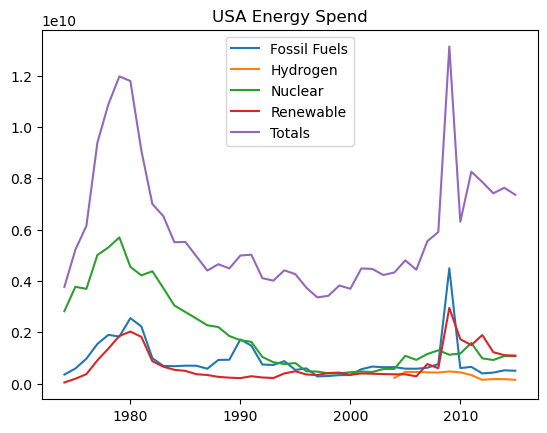

In [97]:
usa_nrg = e_budg[e_budg['COUNTRY']=='USA']

usa_nrg['FOSSILFUEL'] = usa_nrg['FOSSILFUEL'].str.replace(',','').astype(float)
usa_nrg['HGENCELL'] = usa_nrg['HGENCELL'].str.replace(',','').astype(float)
usa_nrg['NUCLEAR'] = usa_nrg['NUCLEAR'].str.replace(',','').astype(float)
usa_nrg['RENEWABLE'] = usa_nrg['RENEWABLE'].str.replace(',','').astype(float)
usa_nrg['TOTAL'] = usa_nrg['TOTAL'].str.replace(',','').astype(float)

plt.plot(usa_nrg['TIME'], usa_nrg['FOSSILFUEL'], label='Fossil Fuels')
plt.plot(usa_nrg['TIME'], usa_nrg['HGENCELL'], label='Hydrogen')
plt.plot(usa_nrg['TIME'], usa_nrg['NUCLEAR'], label='Nuclear')
plt.plot(usa_nrg['TIME'], usa_nrg['RENEWABLE'], label='Renewable')
plt.plot(usa_nrg['TIME'], usa_nrg['TOTAL'], label='Totals')

plt.legend()
plt.title('USA Energy Spend')

plt.show()

In [109]:
e_budg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118 entries, 4 to 7057
Columns: 191 entries, index to UNALLOC
dtypes: float64(5), int64(2), object(184)
memory usage: 1.6+ MB


In [68]:
wbe = pd.read_csv('World_Bank_EducationalData.csv',encoding='iso-8859-1')
wbe = wbe.drop(wbe.index[1800:1805])
wbe['Source']="World Bank"
wbe['Info Category']="Education Metrics"
wbe

,Country Name,Country Code,Series,Series Code,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2025 [YR2025],Source,Info Category
0,United States,USA,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,..,..,..,..,..,..,...,1.75217E+13,1.82193E+13,1.87072E+13,1.94854E+13,2.05443E+13,..,..,..,World Bank,Education Metrics
1,United States,USA,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,World Bank,Education Metrics
2,United States,USA,"Literacy rate, population 25-64 years, both se...",UIS.LR.AG25T64,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,World Bank,Education Metrics
3,United States,USA,PIAAC: Adults by literacy proficiency level (%...,LO.PIAAC.LIT.1,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,World Bank,Education Metrics
4,United States,USA,PIAAC: Adults by literacy proficiency level (%...,LO.PIAAC.LIT.2,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,World Bank,Education Metrics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,"Venezuela, RB",VEN,Proportion of population achieving at least a ...,UIS.YADULT.PROFILITERACY.WPIA,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,World Bank,Education Metrics
1796,"Venezuela, RB",VEN,Proportion of population achieving at least a ...,UIS.YADULT.PROFILITERACY,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,World Bank,Education Metrics
1797,"Venezuela, RB",VEN,Proportion of population achieving at least a ...,UIS.YADULT.PROFILITERACY.LSES,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,World Bank,Education Metrics
1798,"Venezuela, RB",VEN,Gross graduation ratio from first degree progr...,SE.TER.CMPL.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,World Bank,Education Metrics


In [70]:
wbe=wbe.drop(columns=['Series Code'])
wbe = pd.melt(wbe, id_vars=['Country Name','Country Code','Series','Source','Info Category'],var_name = "Year",value_name="Metric")
wbe

,Country Name,Country Code,Series,Source,Info Category,Year,Metric
0,United States,USA,"GDP, PPP (current international $)",World Bank,Education Metrics,1970 [YR1970],..
1,United States,USA,"Adult literacy rate, population 15+ years, bot...",World Bank,Education Metrics,1970 [YR1970],..
2,United States,USA,"Literacy rate, population 25-64 years, both se...",World Bank,Education Metrics,1970 [YR1970],..
3,United States,USA,PIAAC: Adults by literacy proficiency level (%...,World Bank,Education Metrics,1970 [YR1970],..
4,United States,USA,PIAAC: Adults by literacy proficiency level (%...,World Bank,Education Metrics,1970 [YR1970],..
...,...,...,...,...,...,...,...
93595,"Venezuela, RB",VEN,Proportion of population achieving at least a ...,World Bank,Education Metrics,2025 [YR2025],..
93596,"Venezuela, RB",VEN,Proportion of population achieving at least a ...,World Bank,Education Metrics,2025 [YR2025],..
93597,"Venezuela, RB",VEN,Proportion of population achieving at least a ...,World Bank,Education Metrics,2025 [YR2025],..
93598,"Venezuela, RB",VEN,Gross graduation ratio from first degree progr...,World Bank,Education Metrics,2025 [YR2025],..


In [71]:
wbe.to_csv('wbank_ed.csv')

In [3]:
print("Silly G-rabbit (Trix are for kids)\n"
    "I have the book and a memory\n"
    "The idea can still be shared")

Silly G-rabbit (Trix are for kids)
I have the book and a memory
The idea can still be shared


In [4]:
print("MHMM, INDEED\n"
     "(nice caps lock)")

MHMM, INDEED
(nice caps lock)
